In [56]:
#Assignment 9: Data Preprocessing, Feature Engineering & Feature Selection

In [57]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#1.Handle missing values as per the best practices (imputation, removal, etc.).
#Apply scaling techniques to numerical features:
#Standard Scaling   b. Min-Max Scaling
#Discuss the scenarios where each scaling technique is preferred and why.

In [59]:
#Load and Explore the Dataset

In [60]:
# Load the dataset
data = pd.read_csv("adult_with_headers (1).csv")

In [61]:
# Display first few rows
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
# Shape and basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
# Summary statistics
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
#Check and Handle Missing Values
# Check missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [65]:
# Many versions of the Adult dataset use " ?" to denote missing entries
data.replace(" ?", np.nan, inplace=True)

In [66]:
# Separate categorical and numerical columns
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [67]:
# Handle missing values
#   - Numerical features: impute with median (robust to outliers)
#   - Categorical features: impute with mode (most frequent)
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_5108\453266945.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [68]:
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_5108\1194294401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [69]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [70]:
#Apply Scaling Techniques

In [71]:
# Extract numerical columns
num_data = data[num_cols]

In [72]:
# ---- a. Standard Scaling ----
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(num_data)
data_standard_scaled = pd.DataFrame(data_standard_scaled, columns=num_cols)

In [73]:
# ---- b. Min-Max Scaling ----
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(num_data)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=num_cols)

In [74]:
# Display example comparison

In [75]:
data_minmax_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [76]:
data_standard_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [77]:
cat_cols = data.select_dtypes(include='object').columns
list(cat_cols)

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [78]:
#TASK 2. Encoding Techniques:
#●	Apply One-Hot Encoding to categorical variables with less than 5 categories.
#●	Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
#●	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
#●	les with more than 5 categories.
#●	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
#Check number of unique categories for each categorical feature
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} unique values")

workclass: 8 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 14 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 41 unique values
income: 2 unique values


In [81]:
# One-Hot Encoding → categorical columns with <=5 categories
low_cardinality_cols = [col for col in cat_cols if data[col].nunique() <= 5]

In [82]:
# Label Encoding → categorical columns with >5 categories
high_cardinality_cols = [col for col in cat_cols if data[col].nunique() > 5]

In [83]:
low_cardinality_cols

['race', 'sex', 'income']

In [84]:
high_cardinality_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [85]:
# ---- One-Hot Encoding ----
data_onehot = pd.get_dummies(data[low_cardinality_cols], drop_first=True)

In [86]:
# ---- Label Encoding ----
le = LabelEncoder()
data_label = data[high_cardinality_cols].apply(le.fit_transform)

In [87]:
# Combine encoded categorical data with numerical features
num_data = data.select_dtypes(include=['int64', 'float64'])
encoded_data = pd.concat([num_data, data_onehot, data_label], axis=1)

In [88]:
encoded_data.shape

(32561, 18)

In [89]:
encoded_data                    #One-Hot Encoding applied to categorical features with ≤5 categories.
                                #Label Encoding applied to features with >5 categories.

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,False,False,False,True,True,False,6,9,4,0,1,38
1,50,83311,13,0,0,13,False,False,False,True,True,False,5,9,2,3,0,38
2,38,215646,9,0,0,40,False,False,False,True,True,False,3,11,0,5,1,38
3,53,234721,7,0,0,40,False,True,False,False,True,False,3,1,2,5,0,38
4,28,338409,13,0,0,40,False,True,False,False,False,False,3,9,2,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,False,False,False,True,False,False,3,7,2,12,5,38
32557,40,154374,9,0,0,40,False,False,False,True,True,True,3,11,2,6,0,38
32558,58,151910,9,0,0,40,False,False,False,True,False,False,3,11,6,0,4,38
32559,22,201490,9,0,0,20,False,False,False,True,True,False,3,11,4,0,3,38


In [90]:
#Task3. Feature Engineering:
#●	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
#●	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [91]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#Create New Features

In [93]:
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [94]:
#Feature 1: "work_hours_category"
# Categorize people based on their weekly working hours
data['work_hours_category'] = pd.cut(
    data['hours_per_week'],
    bins=[0, 25, 40, 60, 100],
    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme']
)

In [95]:
#  Feature 2: "Capital difference"
data['capital_diff'] = data['capital_gain'] - data['capital_loss']  # ✅ updated names

In [96]:
print(data.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'work_hours_category', 'capital_diff']


In [97]:
# Clean column names for consistency
data.columns = data.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

In [98]:
print(data[['hours_per_week', 'work_hours_category', 'capital_gain', 'capital_loss', 'capital_diff']].head())

   hours_per_week work_hours_category  capital_gain  capital_loss  \
0              40           Full-time          2174             0   
1              13           Part-time             0             0   
2              40           Full-time             0             0   
3              40           Full-time             0             0   
4              40           Full-time             0             0   

   capital_diff  
0          2174  
1             0  
2             0  
3             0  
4             0  


In [99]:
# --------------------------------------------------------------
# ✍️ Rationale:
# --------------------------------------------------------------
# 1️.work_hours_category:
#     - Converts continuous 'hours-per-week' into interpretable categories.
#     - Helps the model capture non-linear patterns in working hours and income.
#     - Example: Someone working 20 hrs/week is very different from 60 hrs/week.

# 2️.capital_diff:
#     - Represents overall capital investment behavior.
#     - Combines gain and loss into a single meaningful metric.
#     - High 'capital_diff' likely correlates with higher income bracket.

In [100]:
# Identify and Transform Skewed Numerical Features

In [101]:
# Check skewness of all numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
skew_values = data[num_cols].skew().sort_values(ascending=False)

In [102]:
skew_values

capital_gain      11.953848
capital_diff      11.871934
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

In [103]:
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'work_hours_category',
 'capital_diff']

In [104]:
#Normalize column names (recommended fix)
data.columns = data.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')

Text(0.5, 1.0, 'Before Log Transformation')

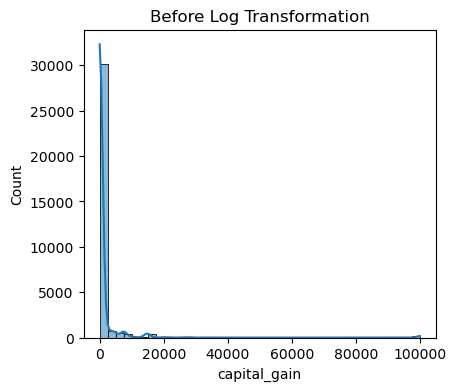

In [105]:
# Visualize the most skewed feature: 'capital-gain'
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['capital_gain'], bins=40, kde=True)
plt.title("Before Log Transformation")

In [106]:
# Apply log transformation
data['capital_gain_log'] = np.log1p(data['capital_gain'])

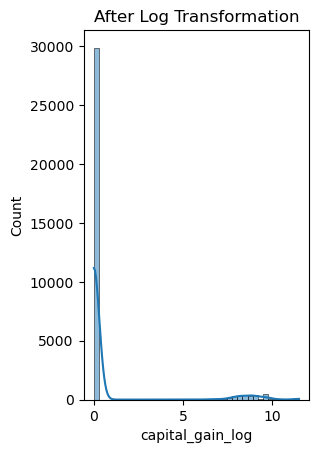

In [107]:
plt.subplot(1,2,2)
sns.histplot(data['capital_gain_log'], bins=40, kde=True)
plt.title("After Log Transformation")
plt.show()

In [108]:
#Check actual column names
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'work_hours_category',
 'capital_diff',
 'capital_gain_log']

In [109]:
#Rename the column to match final naming convention
data.rename(columns={'capital_gain_log': 'log_capital_gain'}, inplace=True)

In [110]:
# --------------------------------------------------------------
#  Final Overview
# --------------------------------------------------------------

print("\nFinal columns created:")
print(['work_hours_category', 'capital_diff', 'log_capital_gain'])

print("\nSample of final engineered features:")
display(data[['work_hours_category', 'capital_diff', 'capital_gain', 'log_capital_gain']].head())



Final columns created:
['work_hours_category', 'capital_diff', 'log_capital_gain']

Sample of final engineered features:


,work_hours_category,capital_diff,capital_gain,log_capital_gain
0,Full-time,2174,2174,7.684784
1,Part-time,0,0,0.000000
2,Full-time,0,0,0.000000
3,Full-time,0,0,0.000000
4,Full-time,0,0,0.000000
